# Multi Armed Bandits - part 2

## Non-Stationary Rewards

### Key Takeaways
1. What is a non stationary problem
2. Modifications needed to solve a non stationary problem
4. How to implement bandit algoithm (Exponential Recency Weighted Average) to solve non stationary problem
5. Compare this method with sample average method

In previous video I covered the sample-average method of solving the bandit problems that involed estimating the Q values of the actions by averaging the rewards the agent recieved up to that time step. The link is in the description of this video along with githublink to this notebook.

However, these methods only work when the rewards probability distribution is stationary that means the mean and variance does not change over time.

If the reward distribution changes over time we call that a non-stationary problem. In such cases we neeed to implement special mechanism to handle the ever changing rewards prob distribution. Most of the reinforcement learning problems have non stationary rewards distribution


### How to track a non stationary problem

- Give more weight to recent rewards than to long-past rewards
- One most popular way to do this is to use a constant step-size parameter
  

As I described in the previous video the increment update rule which said

**New Estimate = Old Estimate + StepSize(Target - Old Estimate)**

The target is also called the nth reward. and the term (Target - Old Estimate) is the error in the estimate. It is reduced by taking a step toward the target.

**One thing to note is that StepSize parameter changes from time step to time step because it is equal to 1/n. We also denote the stepsize paramter as alpha ($\alpha$).**

## Final Implementation

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def add_random_walk():
    #sample_walk = np.random.normal(0,0.01)
    global q_star_a 
    q_star_a = [x + np.random.normal(0,0.01) for x in q_star_a]
    

def max_index(q_a):
    #break ties randomly
    q_a = np.array(q_a)
    return np.random.choice(np.where(q_a == q_a.max())[0])

def bandit(a):
    #each reward for the action will come fromthe prob distribution of that action
    #which has a mean of q*(a) and variance of 1
    add_random_walk()
    reward = np.random.normal(q_star_a[a],1) 
    return reward
    
def one_run(eps,k,steps,constant_step_size=False,alpha=1.0):
    
    q_a = [0]*k
    n_a = [0]*k
    n_a_steps = []
    q_a_steps = []
    r_steps =[0]
    a_steps =[]
  
    for step in range(steps):
        if np.random.random() < eps:
            a = np.random.choice(range(k))
        else:
            a = max_index(q_a)
        #print(f'Action: {a}')
        r = bandit(a)
    
        
        a_steps.append(a)
        
        if constant_step_size:
            alpha = alpha
        else:
            n_a[a] += 1
            alpha = 1/n_a[a]
        q_a[a] = q_a[a] + (alpha) * (r - q_a[a])
       
        n_a_steps.append(n_a.copy())
        q_a_steps.append(q_a.copy())
        r_steps.append(r)
    
    return q_star_a, n_a_steps, q_a_steps, r_steps, a_steps




In [19]:
def run_bandit(n_runs=2000,n_steps=1000,eps=0.01,constant_step_size=False,alpha=1.0):
    n_a_runs = []
    q_a_runs = []
    r_a_runs = []
    for run in range(n_runs):
        q_star_a,n_a,q_a,r_a,a_steps = one_run(eps,k=10,steps=n_steps,constant_step_size=constant_step_size,alpha=alpha)
            
        n_a_runs.append(n_a.copy())
        q_a_runs.append(q_a.copy())
        r_a_runs.append(r_a.copy())
    
    r_values= np.array(r_a_runs)
    avg_rewards = r_values.mean(axis=0)
    return avg_rewards

[1.6399361826358136, 1.6399361826358136, 1.6399361826358136, 1.6399361826358136, 1.6399361826358136, 1.6399361826358136, 1.6399361826358136, 1.6399361826358136, 1.6399361826358136, 1.6399361826358136]


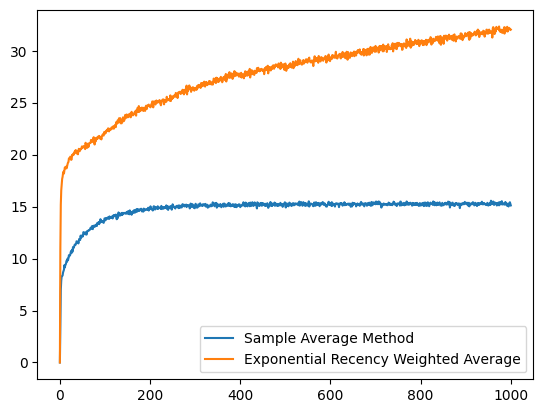

In [20]:

k=10
#Initialize same true value 
q_star_a = [np.random.normal(0,1)]*10
print(q_star_a)

#with sample average method
n_steps=1000
eps = 0.1
rewards = run_bandit(n_steps=n_steps,eps=eps)
plt.plot(rewards,label=f'Sample Average Method');
plt.legend()

#with Exponential Recency Weighted Average method
alpha=0.1
constant_step_size=True
rewards = run_bandit(n_steps=n_steps,eps=eps,constant_step_size=constant_step_size,alpha=alpha)
plt.plot(rewards,label=f'Exponential Recency Weighted Average');
plt.legend()

